# Bank Customer Churn 

In [72]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Data Extraction 

In [73]:
bank = pd.read_csv('Churn_Modelling.csv')

In [74]:
bank.shape

(10000, 14)

In [75]:
bank.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [76]:
bank.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [77]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Selection Data

In [78]:
df = bank[['Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']]
df.head()

Geography  Gender  Age  Tenure  NumOfProducts  HasCrCard  IsActiveMember  \
0    France  Female   42       2              1          1               1   
1     Spain  Female   41       1              1          0               1   
2    France  Female   42       8              3          1               0   
3    France  Female   39       1              2          0               0   
4     Spain  Female   43       2              1          1               1   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0

## Transform Data 

In [79]:
#gender
df.Gender[df.Gender == 'Female'] = 0
df.Gender[df.Gender == 'Male'] = 1
df.head()

C:\Users\bayu\AppData\Local\Temp/ipykernel_15256/3833484157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Gender[df.Gender == 'Female'] = 0
c:\users\bayu\opencv\lib\site-packages\pandas\core\generic.py:8861: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\bayu\AppData\Local\Temp/ipykernel_15256/3833484157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Gender[df.Gender == 'Male

Geography Gender  Age  Tenure  NumOfProducts  HasCrCard  IsActiveMember  \
0    France      0   42       2              1          1               1   
1     Spain      0   41       1              1          0               1   
2    France      0   42       8              3          1               0   
3    France      0   39       1              2          0               0   
4     Spain      0   43       2              1          1               1   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0

## Decision Tree Model 

In [80]:
#split data
X = [[0, 42, 2, 1, 1, 1, 1],
     [0, 41, 1, 1, 0, 1, 0],
     [0, 42, 8, 3, 1, 0, 1],
     [0, 39, 1, 2, 0, 0, 0],
     [0, 43, 2, 1, 1, 1, 0]]
y = ['France', 'Spain', 'France', 'France', 'Spain']
feature = ['Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

In [81]:
#training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[0, 41, 1, 1, 0, 1, 0], [0, 43, 2, 1, 1, 1, 0], [0, 42, 2, 1, 1, 1, 1], [0, 39, 1, 2, 0, 0, 0]]
['Spain', 'Spain', 'France', 'France']
[[0, 42, 8, 3, 1, 0, 1]]
['France']


In [82]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(X, y)
print(dtc)

DecisionTreeClassifier()


In [83]:
prediction = dtc.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print(prediction)
print(accuracy)

['France']
1.0


In [84]:
print(confusion_matrix(y_test, prediction))

[[1]]


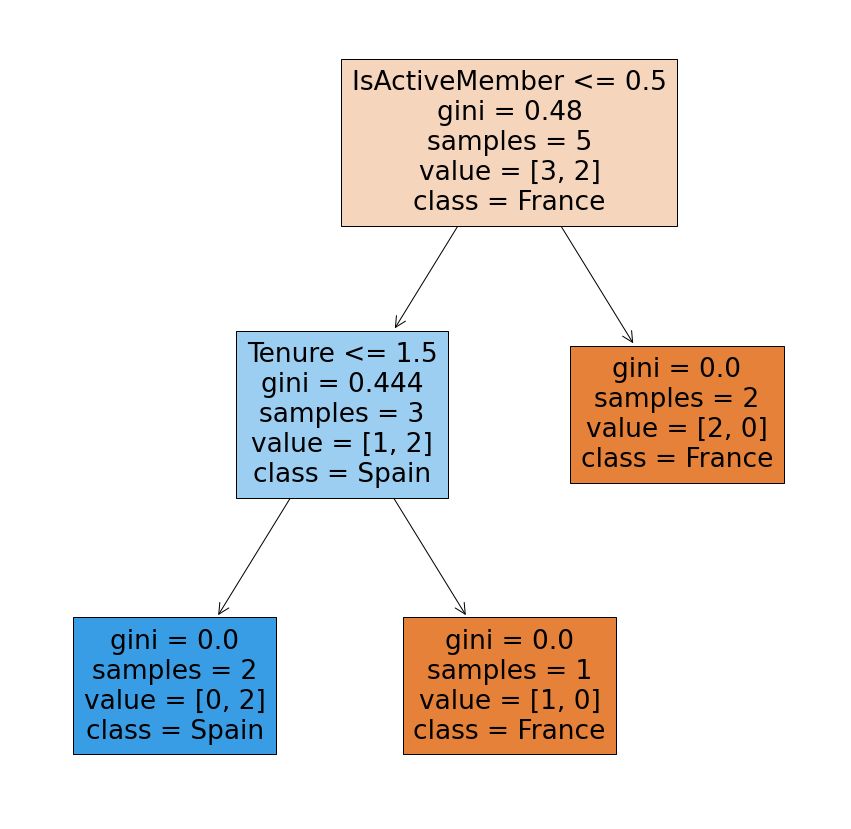

In [85]:
plot = plt.figure(figsize=(15,15))
_ = tree.plot_tree(dtc, 
                   feature_names=feature,  
                   class_names=y,
                   filled=True)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>],
       [<AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'Exited'}>]], dtype=object)

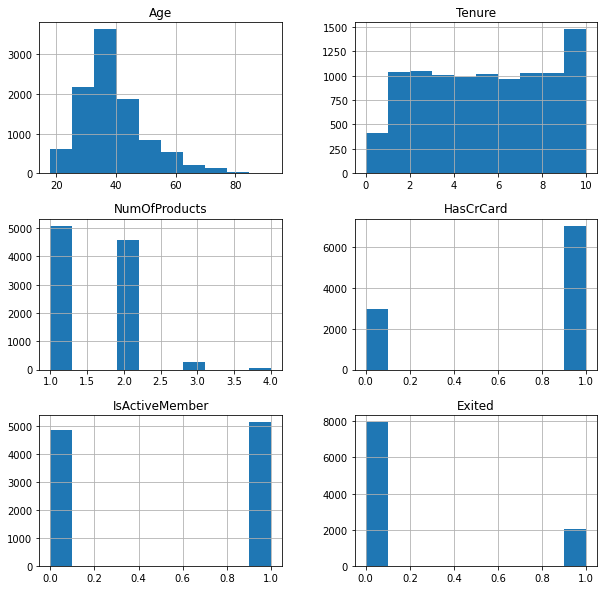

In [86]:
df.hist(figsize=(10,10))

<AxesSubplot:>

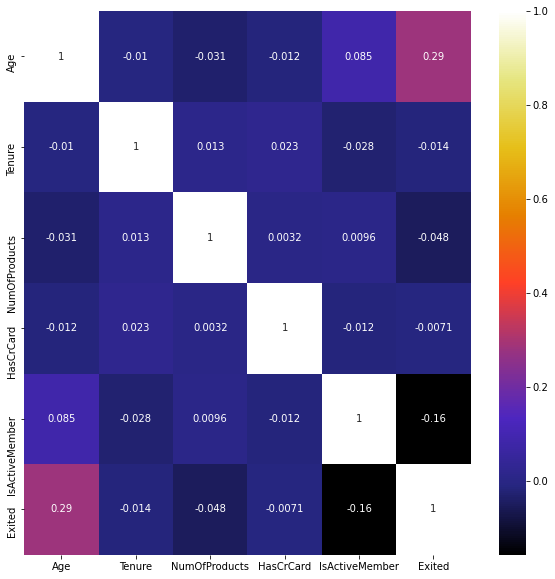

In [87]:
#heatmap correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap = 'CMRmap')

c:\users\bayu\opencv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


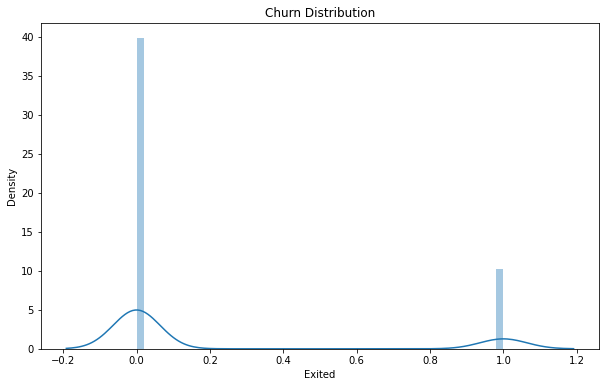

In [88]:
#distribution
plt.figure(figsize=(10,6))
sns.distplot(df.Exited)
plt.title("Churn Distribution")
plt.show()

c:\users\bayu\opencv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


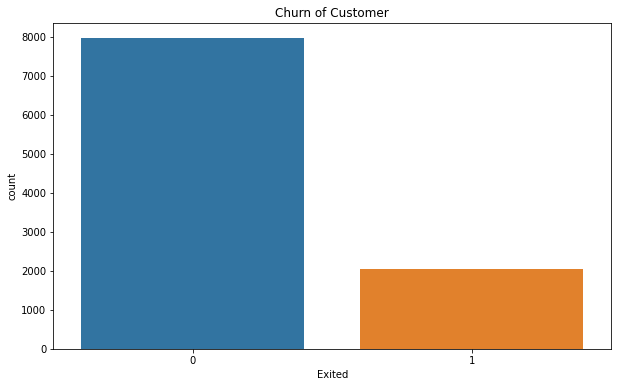

In [89]:
#countplot
plt.figure(figsize=(10,6))
sns.countplot(df.Exited)
plt.title("Churn of Customer")
plt.show()

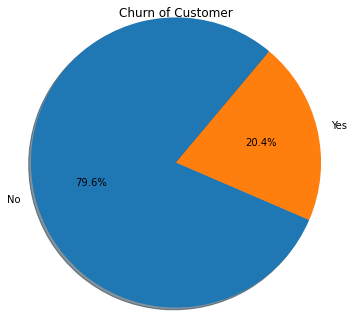

In [90]:
#pie chart
plt.figure(figsize=(5,6))
exited = [np.count_nonzero(df['Exited'] == 0),
         np.count_nonzero(df['Exited'] == 1)]
activities = ['No', 'Yes']
plt.title("Churn of Customer")
plt.pie(exited, labels=activities, radius=1.3, startangle=50, autopct='%.1f%%', shadow=True)
plt.show()

In [91]:
geography_exited = df.groupby(['Geography', 'Exited']).size().reset_index(name = "Count")
print(geography_exited)

  Geography  Exited  Count
0    France       0   4204
1    France       1    810
2   Germany       0   1695
3   Germany       1    814
4     Spain       0   2064
5     Spain       1    413


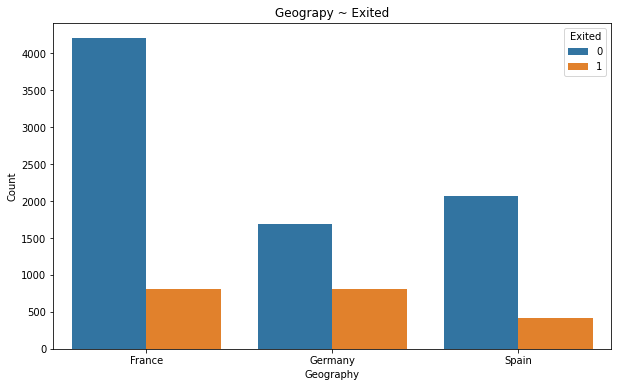

In [92]:
#barplot
plt.figure(figsize=(10,6))
sns.barplot(x="Geography", y="Count", hue="Exited", data=geography_exited)
plt.title("Geograpy ~ Exited")
plt.show()

In [93]:
gender_exited = df.groupby(['Gender', 'Exited']).size().reset_index(name = "Count")
print(gender_exited)

   Gender  Exited  Count
0       0       0   3404
1       0       1   1139
2       1       0   4559
3       1       1    898


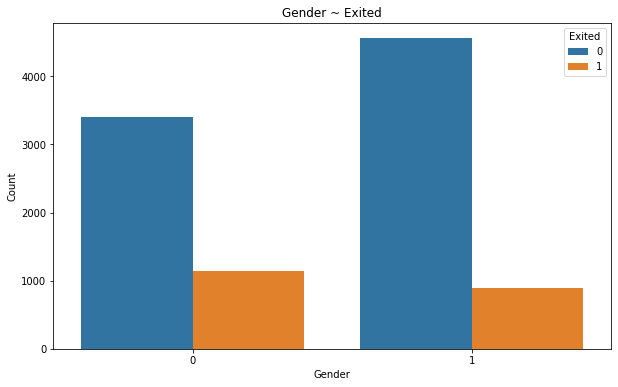

In [94]:
#barplot
plt.figure(figsize=(10,6))
sns.barplot(x="Gender", y="Count", hue="Exited", data=gender_exited)
plt.title("Gender ~ Exited")
plt.show()

<AxesSubplot:xlabel='Exited', ylabel='Density'>

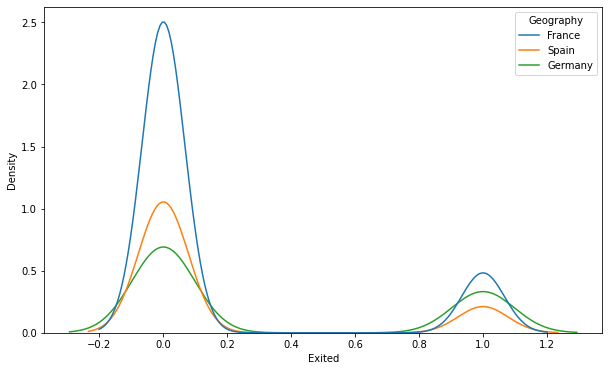

In [95]:
#keplot
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="Exited", hue="Geography")

<AxesSubplot:xlabel='Exited', ylabel='Density'>

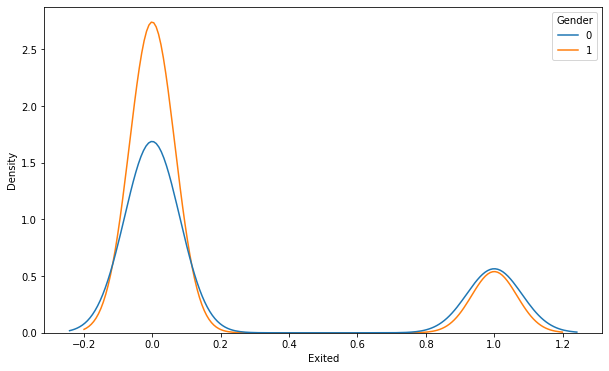

In [96]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="Exited", hue="Gender")